In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import pytz

In [77]:
stages = [
    {"users": 100, "spawn_rate": 5},
    {"users": 200, "spawn_rate": 20},
    {"users": 300, "spawn_rate": 20},
    {"users": 500, "spawn_rate": 20},
    {"users": 800, "spawn_rate": 20},
    {"users": 1300, "spawn_rate": 50},
    {"users": 2100, "spawn_rate": 50}
]

valid_users = set()
for stage in stages:
    valid_users.add(stage['users'])

In [123]:
# CSV Daten in DataFrame einlesen
locust_df = pd.read_csv("data/data_stats_history.csv")
grafana_df = pd.read_csv(
    "data/Stacked_ Pod_Process Power Consumption (W) in Namespace_ default-data-as-joinbyfield-2024-07-02 21_57_14.csv",  parse_dates=['Time'])

# Konvertiere die Zeitstempel in ein datetime-Format, um die Daten einfacher zu analysieren
locust_df['Timestamp'] = pd.to_datetime(locust_df['Timestamp'], unit='s')
# Zeitzone in Deutschland festlegen
germany_tz = pytz.timezone('Europe/Berlin')
locust_df['Timestamp'] = locust_df['Timestamp'].dt.tz_localize('UTC').dt.tz_convert(germany_tz)

grafana_df['Time'] = pd.to_datetime(grafana_df['Time'], utc=True)  # Ensure consistent timezone
grafana_df.set_index('Time', inplace=True)

# Setze den Zeitstempel als Index
locust_df.set_index('Timestamp', inplace=True)

# Entferne die Spalte 'Type'
locust_df.drop(columns=['Type'], inplace=True)

# Filtere die Zeilen, bei denen 'Request Count' gleich 0 ist
locust_df = locust_df[locust_df['Total Request Count'] != 0]

# Entferne alle Zeilen, bei denen 'users' nicht im Set 'valid_users' ist
locust_df = locust_df[locust_df['User Count'].isin(valid_users)]

In [124]:
locust_df

,User Count,Name,Requests/s,Failures/s,50%,66%,75%,80%,90%,95%,...,99.9%,99.99%,100%,Total Request Count,Total Failure Count,Total Median Response Time,Total Average Response Time,Total Min Response Time,Total Max Response Time,Total Average Content Size
Timestamp,,,,,,,,,,,,,,,,,,,,,
2024-07-02 21:24:19+02:00,100,Aggregated,0.000000,0.0,58.0,90.0,96.0,110.0,120.0,330.0,...,330.0,330.0,330.0,17,0,58.0,84.963634,47.792112,333.036135,4030.352941
2024-07-02 21:24:20+02:00,100,Aggregated,0.000000,0.0,60.0,67.0,96.0,110.0,310.0,390.0,...,420.0,420.0,420.0,40,0,60.0,99.754405,43.335663,415.191033,5211.550000
2024-07-02 21:24:21+02:00,100,Aggregated,0.000000,0.0,60.0,67.0,96.0,110.0,310.0,390.0,...,420.0,420.0,420.0,40,0,60.0,99.754405,43.335663,415.191033,5211.550000
2024-07-02 21:24:22+02:00,100,Aggregated,23.000000,0.0,60.0,67.0,75.0,96.0,300.0,340.0,...,420.0,420.0,420.0,112,0,60.0,99.470215,43.335663,415.191033,5146.696429
2024-07-02 21:24:23+02:00,100,Aggregated,25.333333,0.0,60.0,67.0,75.0,97.0,300.0,340.0,...,420.0,420.0,420.0,157,0,60.0,101.551461,43.335663,415.191033,8653.095541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-02 21:31:33+02:00,2100,Aggregated,503.200000,79.4,120.0,210.0,380.0,640.0,2300.0,11000.0,...,29000.0,32000.0,104000.0,37379,6816,120.0,1398.033334,37.146238,103979.248612,10740.177800
2024-07-02 21:31:34+02:00,2100,Aggregated,484.000000,64.6,120.0,210.0,370.0,620.0,2200.0,10000.0,...,29000.0,32000.0,104000.0,38014,6819,120.0,1381.515021,37.146238,103979.248612,10814.278055
2024-07-02 21:31:35+02:00,2100,Aggregated,487.900000,56.3,120.0,210.0,360.0,610.0,2200.0,9900.0,...,29000.0,32000.0,104000.0,38692,6821,120.0,1364.367731,37.146238,103979.248612,10890.577406


In [125]:
grafana_df

,feedservice / default / Total,feedservice-db / default / Total,gateway / default / Total,grafana / default / Total,notificationservice / default / Total,notificationservice-db / default / Total,postservice / default / Total,postservice-db / default / Total,prometheus / default / Total,rabbitmq / default / Total,redis / default / Total,servicediscovery / default / Total,snmp-exporter / default / Total,statisticservice / default / Total,statisticservice-db / default / Total,userservice / default / Total,userservice-db / default / Total,zipkin / default / Total
Time,,,,,,,,,,,,,,,,,,
2024-07-01 21:57:00+00:00,3.67,0.7000,2.87,0.0667,1.93,0.5330,3.83,2.8700,0.0333,0.100,0.0667,0.733,0.0000,3.50,1.6300,2.60,0.4330,0.100
2024-07-01 21:57:30+00:00,4.53,0.8000,2.67,0.0667,2.27,0.6000,6.17,4.6700,0.1000,0.167,0.0667,0.733,0.0333,4.33,2.3700,4.00,0.6330,0.233
2024-07-01 21:58:00+00:00,5.00,0.8330,3.67,0.0667,2.73,0.6330,6.50,5.2700,0.0333,0.100,0.0667,0.800,0.0000,4.33,2.9000,3.30,0.6330,0.267
2024-07-01 21:58:30+00:00,4.40,0.8000,3.00,0.0667,2.33,0.6000,5.77,4.5700,0.0667,0.133,0.0333,0.867,0.0667,4.13,3.0300,3.53,0.6330,0.167
2024-07-01 21:59:00+00:00,5.67,0.7330,2.90,0.0667,2.20,0.6330,5.60,4.8700,0.0667,0.133,0.1000,0.767,0.0333,3.67,3.3000,3.00,0.7330,0.167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-02 21:55:00+00:00,1.27,0.1000,1.07,0.2330,1.07,0.1000,1.17,0.1000,0.0667,0.133,0.0881,0.800,0.0333,1.07,0.1000,1.03,0.1000,0.100
2024-07-02 21:55:30+00:00,1.30,0.0667,1.17,0.3000,1.17,0.0667,1.20,0.0667,0.1000,0.133,0.0667,0.633,0.0333,1.07,0.0667,1.17,0.0333,0.100
2024-07-02 21:56:00+00:00,2.73,0.1330,2.40,0.3330,1.43,0.1670,4.40,0.2330,0.0667,0.100,0.1000,0.567,0.0333,1.73,0.2000,1.87,0.1670,0.100


<Figure size 1200x600 with 0 Axes>

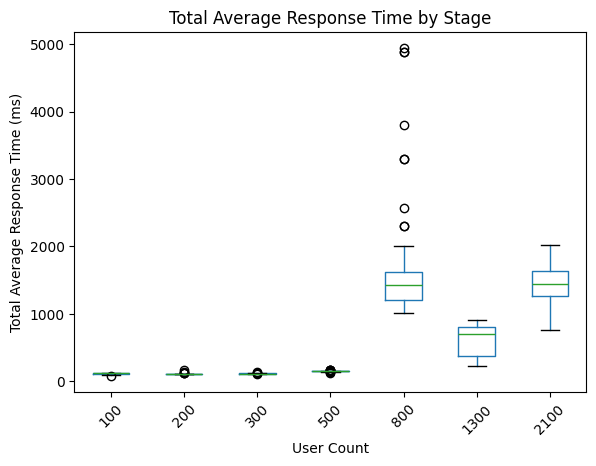

<Figure size 1200x600 with 0 Axes>

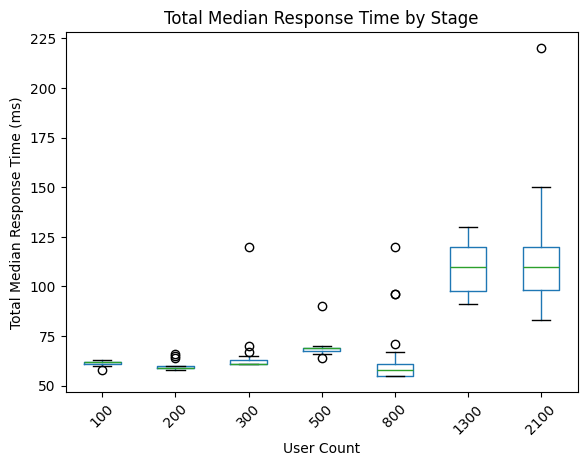

In [93]:
# Box plot für Total Average Response Time
plt.figure(figsize=(12, 6))
locust_df.boxplot(column='Total Average Response Time', by='User Count', grid=False)
plt.title('Total Average Response Time by Stage')
plt.suptitle('')
plt.xlabel('User Count')
plt.ylabel('Total Average Response Time (ms)')
plt.xticks(rotation=45)
plt.show()

# Box plot für Total Median Response Time
plt.figure(figsize=(12, 6))
locust_df.boxplot(column='Total Median Response Time', by='User Count', grid=False)
plt.title('Total Median Response Time by Stage')
plt.suptitle('')
plt.xlabel('User Count')
plt.ylabel('Total Median Response Time (ms)')
plt.xticks(rotation=45)
plt.show()

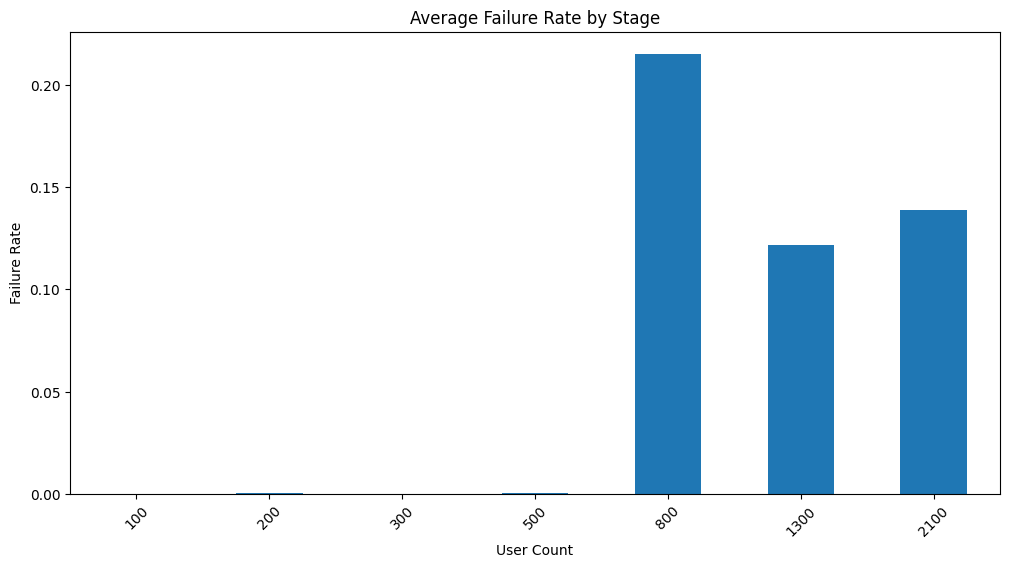

In [94]:
# Fehlerrate analysieren
locust_df['Failure Rate'] = locust_df['Total Failure Count'] / (
            locust_df['Total Request Count'] + locust_df['Total Failure Count'])

plt.figure(figsize=(12, 6))
locust_df.groupby('User Count')['Failure Rate'].mean().plot(kind='bar', rot=45)
plt.title('Average Failure Rate by Stage')
plt.xlabel('User Count')
plt.ylabel('Failure Rate')
plt.show()

           Total Average Response Time                           \
                                  mean       median         std   
User Count                                                        
100                         114.937331   119.483580    8.890553   
200                         116.367190   113.324083    9.928553   
300                         116.588293   115.516466    5.002564   
500                         149.745218   149.048673    6.871380   
800                        1684.458131  1431.661777  893.751659   
1300                        593.056670   706.890504  225.716386   
2100                       1450.497111  1443.089123  234.440042   

           Total Median Response Time                   Failure Rate  \
                                 mean median        std         mean   
User Count                                                             
100                         61.375000   62.0   1.029999     0.000000   
200                         59.857143   5

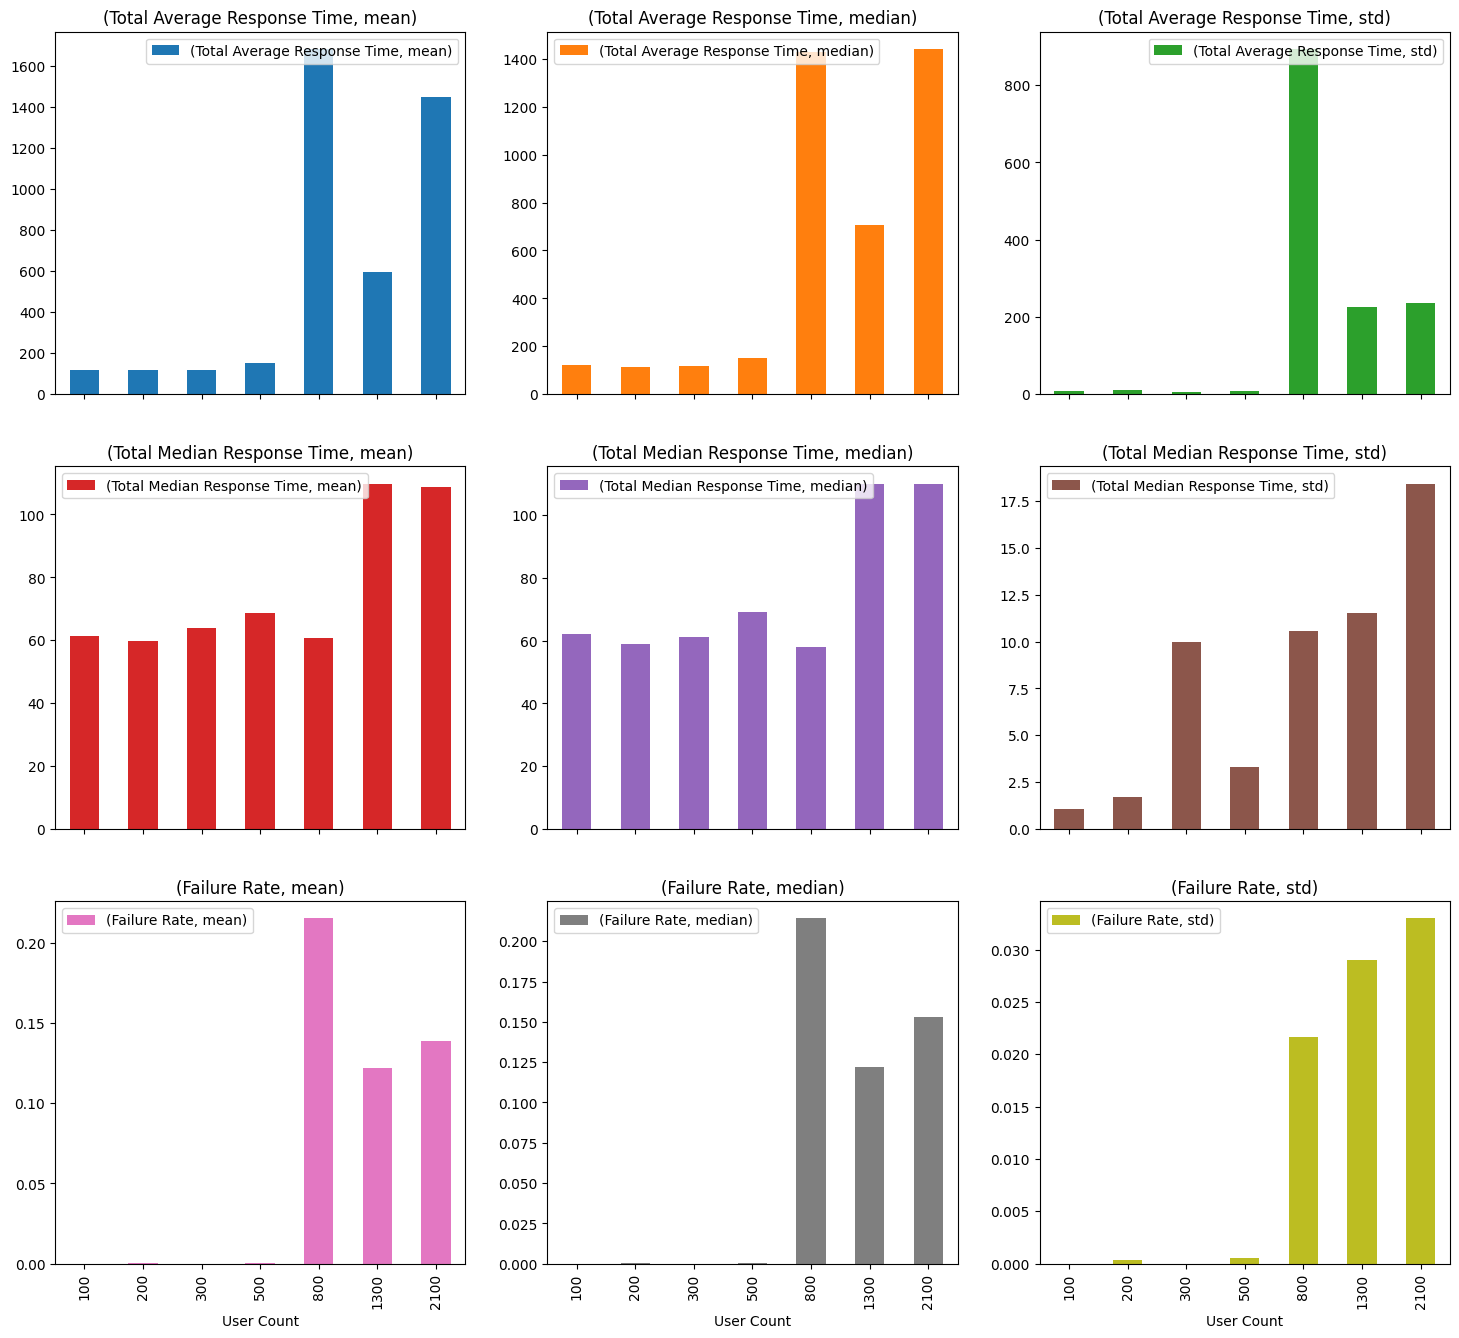

In [95]:
# Gesamte Läufe vergleichen
summary_stats = locust_df.groupby('User Count').agg({
    'Total Average Response Time': ['mean', 'median', 'std'],
    'Total Median Response Time': ['mean', 'median', 'std'],
    'Failure Rate': ['mean', 'median', 'std']
})

print(summary_stats)

# Visualisierung der zusammengefassten Statistiken
summary_stats.plot(kind='bar', subplots=True, layout=(3, 3), figsize=(18, 16))
plt.show()

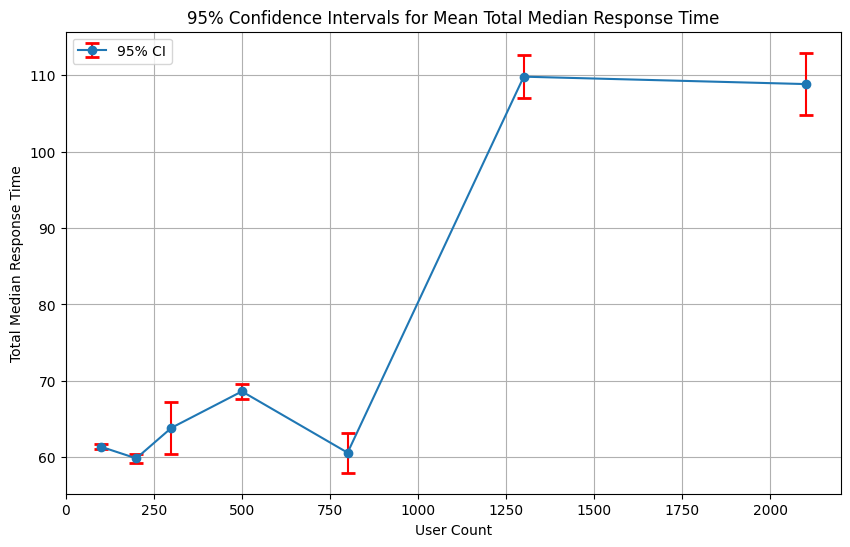

In [96]:
# Calculate confidence intervals for the 'Total Median Response Time'
grouped_stats = locust_df.groupby('User Count')['Total Median Response Time'].agg(['mean', 'count', 'std'])

# Calculate t-value for a 95% confidence interval
t_value = stats.t.ppf(0.975, grouped_stats['count'] - 1)  # 0.975 corresponds to (1 - alpha/2)

# Calculate the margin of error
grouped_stats['margin_of_error'] = t_value * grouped_stats['std'] / (grouped_stats['count'] ** 0.5)

# Calculate the lower and upper bounds of the confidence interval
grouped_stats['ci_low'] = grouped_stats['mean'] - grouped_stats['margin_of_error']
grouped_stats['ci_high'] = grouped_stats['mean'] + grouped_stats['margin_of_error']

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(grouped_stats.index, grouped_stats['mean'],
             yerr=grouped_stats['margin_of_error'],
             fmt='-o', ecolor='r', capsize=5, capthick=2, label='95% CI')

plt.title('95% Confidence Intervals for Mean Total Median Response Time')
plt.xlabel('User Count')
plt.ylabel('Total Median Response Time')
plt.legend()
plt.grid(True)
plt.show()

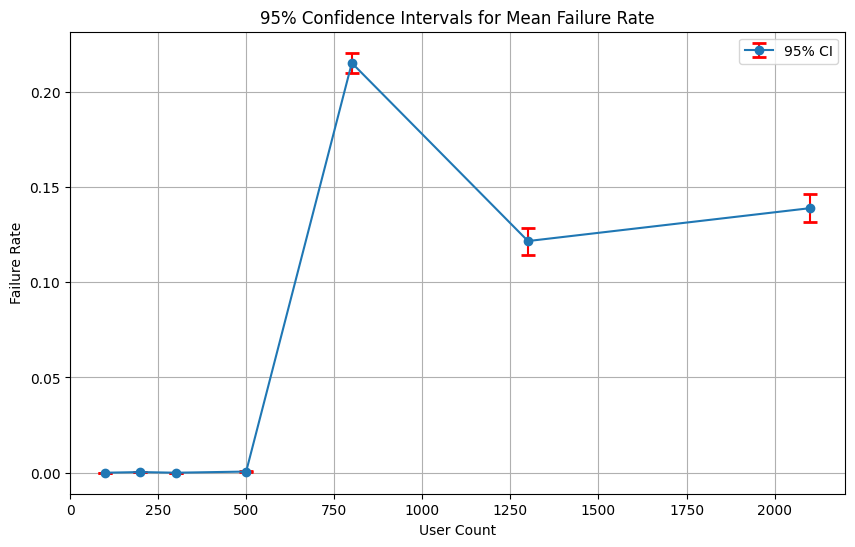

In [97]:
# Calculate confidence intervals for the 'Failure Rate'
grouped_stats = locust_df.groupby('User Count')['Failure Rate'].agg(['mean', 'count', 'std'])

# Calculate t-value for a 95% confidence interval
t_value = stats.t.ppf(0.975, grouped_stats['count'] - 1)  # 0.975 corresponds to (1 - alpha/2)

# Calculate the margin of error
grouped_stats['margin_of_error'] = t_value * grouped_stats['std'] / (grouped_stats['count'] ** 0.5)

# Calculate the lower and upper bounds of the confidence interval
grouped_stats['ci_low'] = grouped_stats['mean'] - grouped_stats['margin_of_error']
grouped_stats['ci_high'] = grouped_stats['mean'] + grouped_stats['margin_of_error']

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(grouped_stats.index, grouped_stats['mean'],
             yerr=grouped_stats['margin_of_error'],
             fmt='-o', ecolor='r', capsize=5, capthick=2, label='95% CI')

plt.title('95% Confidence Intervals for Mean Failure Rate')
plt.xlabel('User Count')
plt.ylabel('Failure Rate')
plt.legend()
plt.grid(True)
plt.show()

User Count: 100, Total Power: 18.006700000000002 W 2024-07-02 21:24:19+02:00 2024-07-02 21:24:59+02:00
User Count: 200, Total Power: 18.7694 W 2024-07-02 21:25:05+02:00 2024-07-02 21:25:39+02:00
User Count: 300, Total Power: 18.4604 W 2024-07-02 21:25:45+02:00 2024-07-02 21:26:19+02:00
User Count: 500, Total Power: 38.129000000000005 W 2024-07-02 21:26:30+02:00 2024-07-02 21:27:19+02:00
User Count: 800, Total Power: 31.934200000000004 W 2024-07-02 21:27:35+02:00 2024-07-02 21:28:40+02:00
User Count: 1300, Total Power: 27.792700000000004 W 2024-07-02 21:28:52+02:00 2024-07-02 21:29:59+02:00
User Count: 2100, Total Power: 35.4199 W 2024-07-02 21:30:17+02:00 2024-07-02 21:31:37+02:00


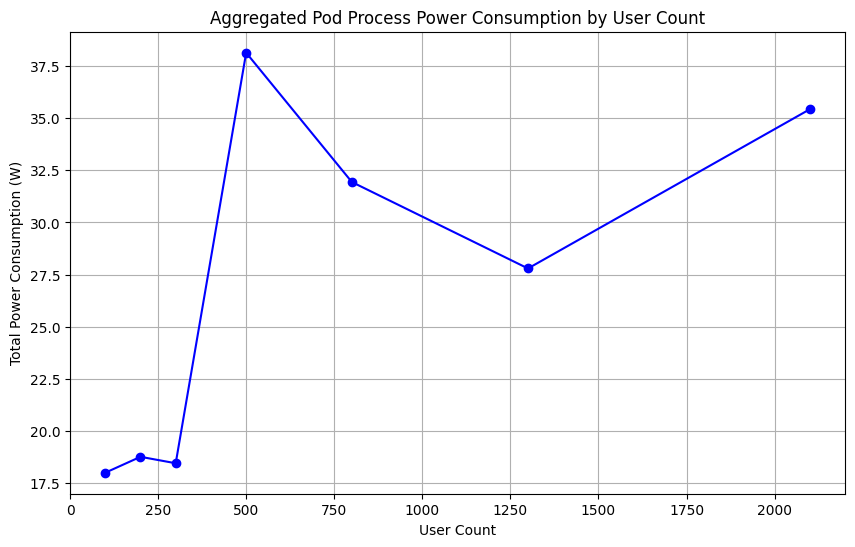

In [131]:
stage_times = []
for stage in stages:
    user_count = stage['users']
    stage_df = locust_df[locust_df['User Count'] == user_count]
    if not stage_df.empty:
        start_time = stage_df.index.min()
        end_time = stage_df.index.max()
        stage_times.append((user_count, start_time, end_time))

total_power = {}

# For each user count stage, filter grafana data and calculate the power consumption
for user_count, start_time, end_time in stage_times:
    stage_grafana_df = grafana_df[start_time:end_time]

    # Calculate the total power consumption by summing all columns
    stage_power = stage_grafana_df.sum(axis=1).sum()
    total_power[user_count] = stage_power

    print(f'User Count: {user_count}, Total Power: {stage_power} W', start_time, end_time)

# Plot aggregated power consumption by user count
user_counts = sorted(total_power.keys())
total_power_consumed = [total_power[user_count] for user_count in user_counts]

plt.figure(figsize=(10, 6))
plt.plot(user_counts, total_power_consumed, marker='o', linestyle='-', color='b')
plt.title('Aggregated Pod Process Power Consumption by User Count')
plt.xlabel('User Count')
plt.ylabel('Total Power Consumption (W)')
plt.grid(True)
plt.show()